In [1]:
import pandas as pd
import os
import json

In [31]:
folder1 = '../logs/cond_a_film/walker2d-medium-v2/plans/'
folder2 = '../logs/cond_a_nofilm/walker2d-medium-v2/plans/'

In [32]:
# get all the file names
subfolders1 = os.listdir(folder1)
subfolders2 = os.listdir(folder2)

# get the sub names
subfolders1 = [os.path.join(folder1, f) for f in subfolders1]
subfolders2 = [os.path.join(folder2, f) for f in subfolders2]

# combine all
subfolders = subfolders1 + subfolders2
print(subfolders)

['../logs/cond_a_film/walker2d-medium-v2/plans/H16_T20_w0.5_m-1.0_wsFalse', '../logs/cond_a_film/walker2d-medium-v2/plans/H16_T20_w1.5_m-1.0_wsTrue', '../logs/cond_a_film/walker2d-medium-v2/plans/H32_T20_w0.5_m0.5_wsTrue', '../logs/cond_a_film/walker2d-medium-v2/plans/H32_T20_w0.5_m0.5_wsFalse', '../logs/cond_a_film/walker2d-medium-v2/plans/H32_T20_w3.0_m-1.0_wsTrue', '../logs/cond_a_film/walker2d-medium-v2/plans/H16_T20_w0.5_m0.5_wsTrue', '../logs/cond_a_film/walker2d-medium-v2/plans/H16_T20_w3.0_m-1.0_wsFalse', '../logs/cond_a_film/walker2d-medium-v2/plans/H32_T20_w1.5_m-1.0_wsFalse', '../logs/cond_a_film/walker2d-medium-v2/plans/H32_T20_w3.0_m0.5_wsFalse', '../logs/cond_a_film/walker2d-medium-v2/plans/H32_T20_w0.7_m-1.0_wsFalse', '../logs/cond_a_film/walker2d-medium-v2/plans/H32_T20_w1.5_m0.5_wsTrue', '../logs/cond_a_film/walker2d-medium-v2/plans/H32_T20_w0.5_m-1.0_wsFalse', '../logs/cond_a_film/walker2d-medium-v2/plans/H16_T20_w0.7_m0.5_wsTrue', '../logs/cond_a_film/walker2d-medium

In [33]:
def extract_settings(subfolder):
    parts = subfolder.split("_")
    H = int(parts[0][1:])
    T = int(parts[1][1:])
    w = float(parts[2][1:])
    m = float(parts[3][1:])
    ws = parts[4][2:] == "True"
    return H, T, w, m, ws

In [34]:
# get the data
data = []
for subfolder in subfolders:
    with open(os.path.join(subfolder, "rollout.json")) as f:
        curr_data = json.load(f)
        assert(curr_data["epoch_diffusion"] == 300000)
        H, T, w, m, ws = extract_settings(subfolder.split("/")[-1])
        nofilm = "nofilm" in subfolder
        row = {
            "film": not nofilm,
            "horizon": H,
            "diffusion_steps": T,
            "guidance_weight": w,
            "ensemble_temperature": m,
            "weight_starting": ws,
            "mean_return": curr_data["mean_return"],
        }
        data.append(row)

In [35]:
# create the dataframe
df = pd.DataFrame(data)
df.head()

,film,horizon,diffusion_steps,guidance_weight,ensemble_temperature,weight_starting,mean_return
0,True,16,20,0.5,-1.0,False,2695.392412
1,True,16,20,1.5,-1.0,True,2796.571395
2,True,32,20,0.5,0.5,True,2228.414709
3,True,32,20,0.5,0.5,False,2520.112659
4,True,32,20,3.0,-1.0,True,1886.337570


In [36]:
# sort by mean return
df = df.sort_values(by="mean_return", ascending=False)
df.head(10) # print the top 10 results

,film,horizon,diffusion_steps,guidance_weight,ensemble_temperature,weight_starting,mean_return
32,False,16,20,0.5,-1.0,False,3091.868809
31,True,16,20,0.5,-1.0,True,2971.399337
56,False,32,20,0.5,-1.0,True,2959.077661
51,False,16,20,0.7,-1.0,True,2928.126572
35,False,32,20,0.5,0.5,False,2918.793539
19,True,16,20,0.7,-1.0,True,2904.155948
52,False,32,20,0.7,0.5,False,2895.191287
63,False,16,20,0.5,-1.0,True,2894.085253
37,False,16,20,0.5,0.5,True,2860.844342
43,False,32,20,0.5,-1.0,False,2811.774418


In [37]:
# save df
df.to_csv(f"walker2d_medium_results.csv", index=False)

In [38]:
# compare film v no film
df.groupby("film")["mean_return"].mean()

film
False    2434.985272
True     2330.795950
Name: mean_return, dtype: float64

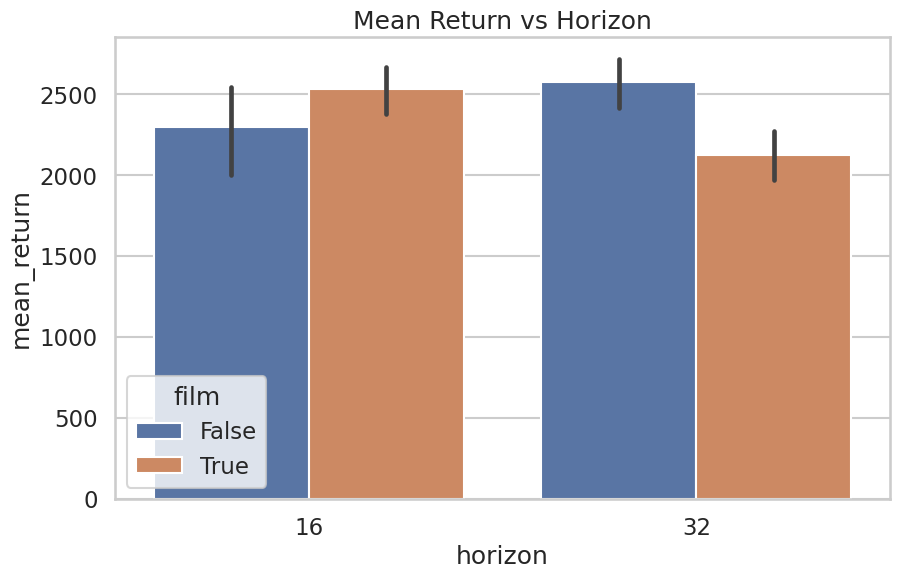

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="horizon", y="mean_return", hue="film", data=df)
plt.title("Mean Return vs Horizon")
plt.show()

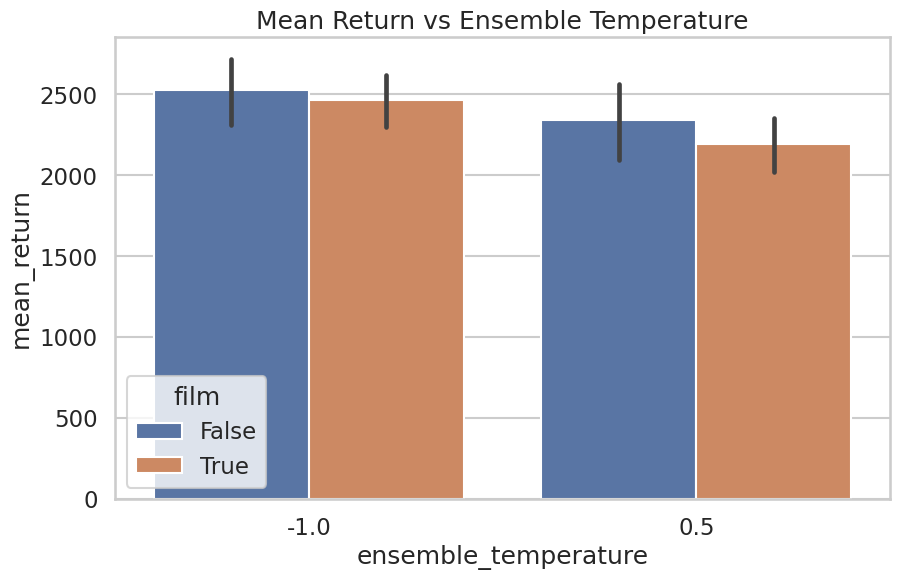

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="ensemble_temperature", y="mean_return", hue="film", data=df)
plt.title("Mean Return vs Ensemble Temperature")
plt.show()

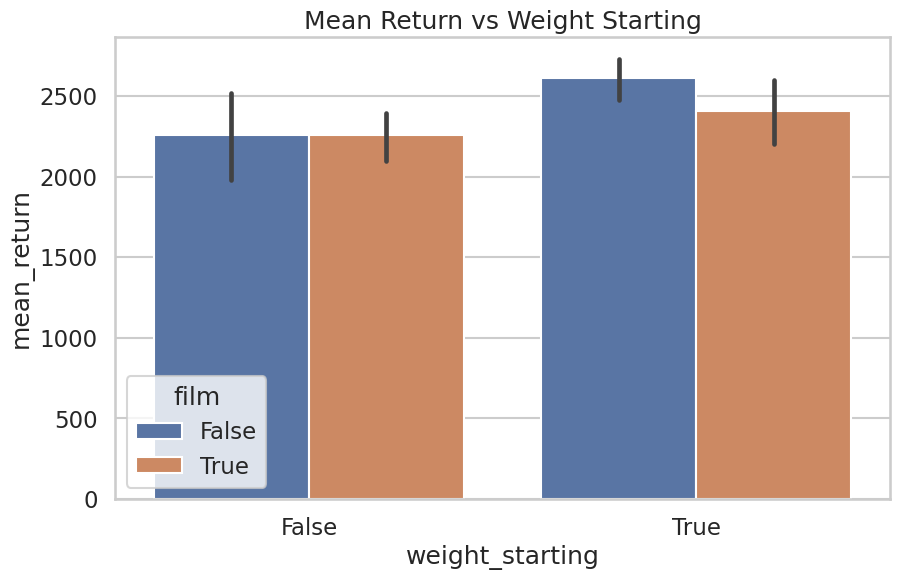

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="weight_starting", y="mean_return", hue="film", data=df)
plt.title("Mean Return vs Weight Starting")
plt.show()

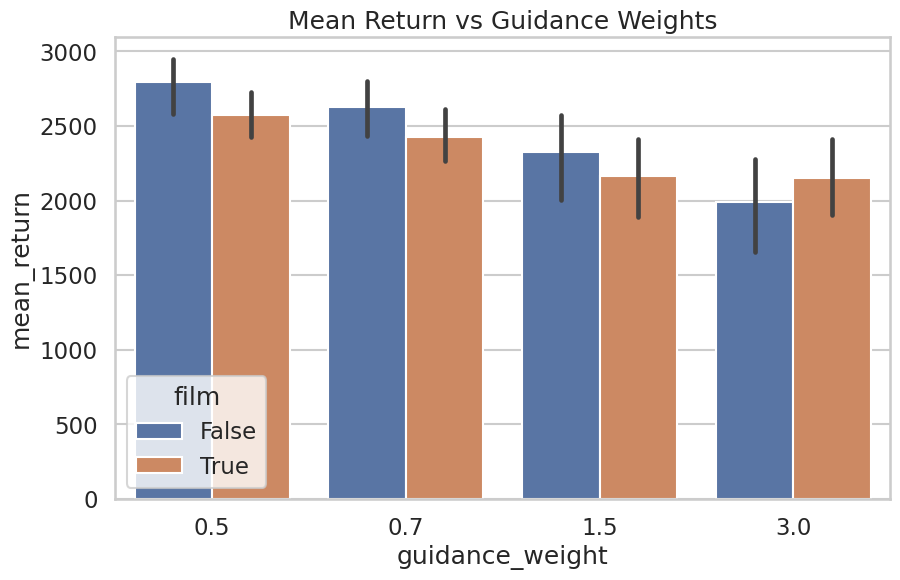

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="guidance_weight", y="mean_return", hue="film", data=df)
plt.title("Mean Return vs Guidance Weights")
plt.show()